In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crowdness_gym_data.csv')

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.shape

(62184, 11)

# Exploratory data analysis


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


*number_people: this is the number of people at the gym at each observation. This will be our target variable or label.

*date: a string value with the specific date and time information.

*timestamp: an integer (int), with the number of seconds since the start of the day (00:00).

*dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.

*is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.

*is_holiday: a Boolean value defining if the observation happened during a 
holiday. 1 for yes, 0 for no.

*temperature: a float, defining the temperature during the day of the 
observation in Fahrenheit.

*isstartof_semester: a Boolean defining if the observation happened in the 
first 2 weeks of a semester. 1 for yes, 0 for no.

*is_during_semester: a Boolean defining if the observation happened during the 
active semester. 1 for yes, 0 for no.

*month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.

*hour: an integer (int) for the hour of the day from 0 to 23.

In [6]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [7]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

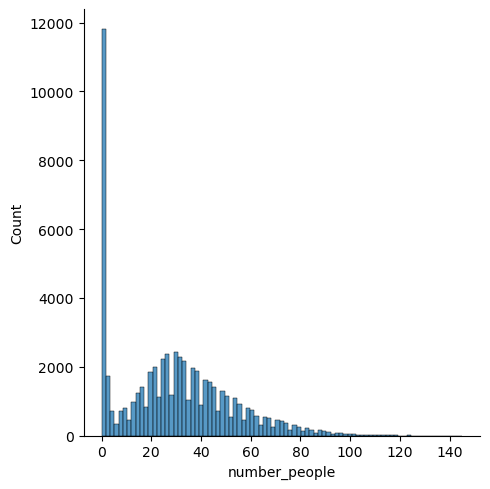

In [9]:
sns.displot(df["number_people"])

In [11]:
is_closed = df[(df['number_people'] == 0) & (df['is_holiday'] == 1)]
is_closed.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,73.0,73.000000,73.0,73.0,73.0,73.000000,73.0,73.0,73.0,73.000000
mean,0.0,33984.589041,0.0,0.0,1.0,46.303562,0.0,0.0,1.0,8.945205
std,0.0,29150.182577,0.0,0.0,0.0,1.698599,0.0,0.0,0.0,8.103309
min,0.0,848.000000,0.0,0.0,1.0,44.150000,0.0,0.0,1.0,0.000000
25%,0.0,11671.000000,0.0,0.0,1.0,44.850000,0.0,0.0,1.0,3.000000
50%,0.0,23096.000000,0.0,0.0,1.0,45.870000,0.0,0.0,1.0,6.000000
75%,0.0,70862.000000,0.0,0.0,1.0,48.150000,0.0,0.0,1.0,19.000000
max,0.0,85921.000000,0.0,0.0,1.0,49.680000,0.0,0.0,1.0,23.000000


In [12]:
pd.set_option('display.max_rows', 75)

In [13]:
is_closed

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
59262,0,2017-01-02 00:14:08-08:00,848,0,0,1,46.83,0,0,1,0
59263,0,2017-01-02 00:24:09-08:00,1449,0,0,1,46.83,0,0,1,0
59264,0,2017-01-02 00:34:10-08:00,2050,0,0,1,46.83,0,0,1,0
59265,0,2017-01-02 00:44:11-08:00,2651,0,0,1,46.83,0,0,1,0
59266,0,2017-01-02 00:54:12-08:00,3252,0,0,1,46.83,0,0,1,0
59267,0,2017-01-02 01:04:13-08:00,3853,0,0,1,46.50,0,0,1,1
59268,0,2017-01-02 01:14:14-08:00,4454,0,0,1,46.50,0,0,1,1
59269,0,2017-01-02 01:24:15-08:00,5055,0,0,1,46.50,0,0,1,1
59270,0,2017-01-02 01:34:17-08:00,5657,0,0,1,46.50,0,0,1,1
59271,0,2017-01-02 01:44:18-08:00,6258,0,0,1,46.50,0,0,1,1


In [14]:
df = df.drop(is_closed.index)

Maybe we can consider the gym closed on January 2nd.

In [15]:
people_zero = df[df['number_people'] == 0]
people_zero.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
33,0,2015-08-14 23:40:08-07:00,85208,4,0,0,67.00,0,0,8,23
34,0,2015-08-14 23:50:09-07:00,85809,4,0,0,67.00,0,0,8,23
35,0,2015-08-15 00:00:10-07:00,10,5,1,0,66.76,0,0,8,0
37,0,2015-08-15 00:30:09-07:00,1809,5,1,0,66.76,0,0,8,0
38,0,2015-08-15 00:40:10-07:00,2410,5,1,0,66.76,0,0,8,0


<Axes: xlabel='hour', ylabel='count'>

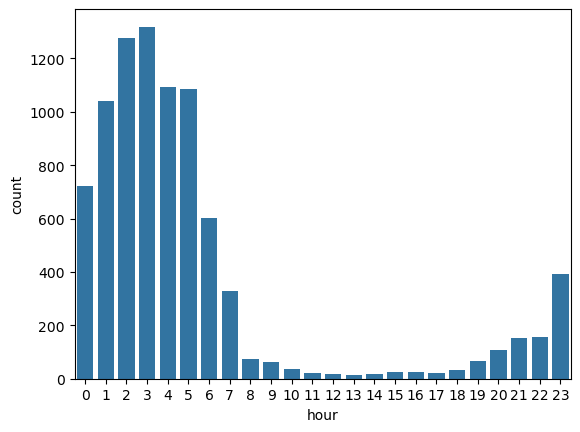

In [16]:
sns.countplot(x='hour', data=people_zero)

1,2,3,4, and 5 a.m. are empty hours, as most people do not go to the gym at these times.

In [17]:
df['number_people'].describe()

count    62111.000000
mean        29.106712
std         22.680440
min          0.000000
25%          9.000000
50%         28.000000
75%         43.000000
max        145.000000
Name: number_people, dtype: float64

In [18]:
df['number_people'].mean()

29.106712176587077

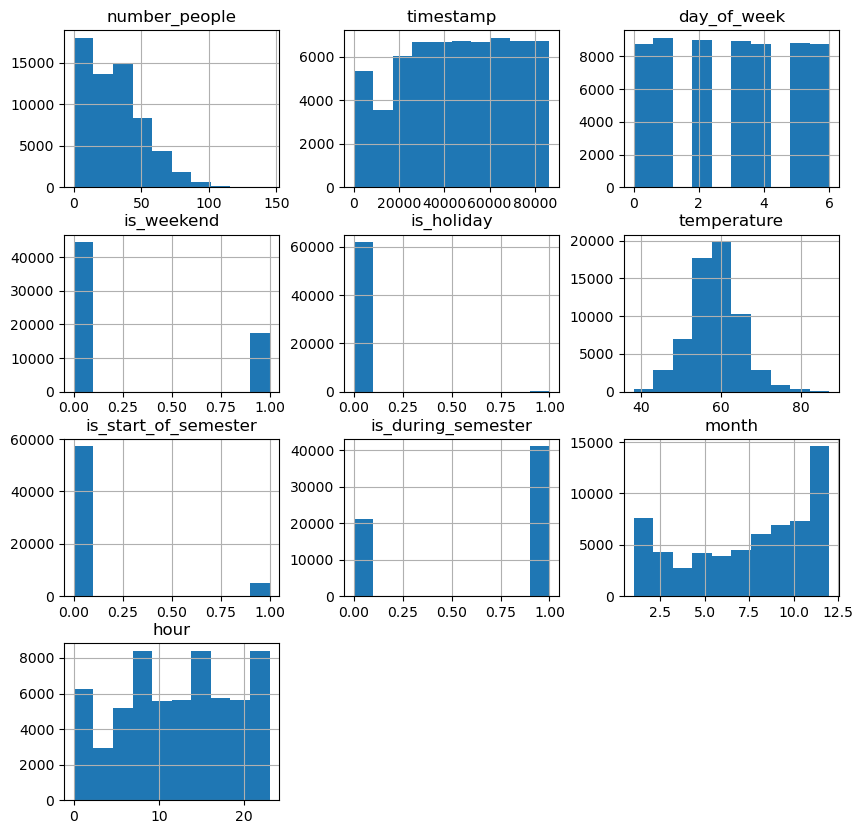

In [19]:
df.hist(figsize=(10,10));

In [20]:
# We already have this information in the hour column.
df = df.drop(['timestamp','date'], axis=1)

In [21]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


In [22]:
df.groupby('day_of_week')['number_people'].sum()

day_of_week
0    288590
1    296140
2    291356
3    269721
4    261196
5    202524
6    198320
Name: number_people, dtype: int64

Text(0.5, 0, 'Day of the week')

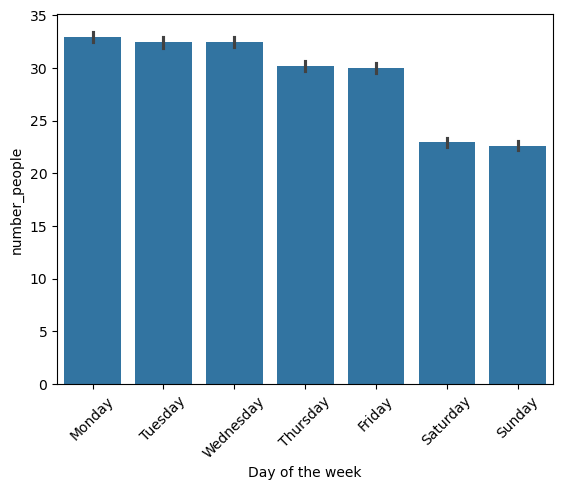

In [23]:
sns.barplot(data =df, x= 'day_of_week', y ='number_people')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
       rotation=45);
plt.xlabel('Day of the week')

It seems that Monday is the most crowded day on average.

In [24]:
df['is_weekend'].value_counts()

is_weekend
0    44521
1    17590
Name: count, dtype: int64

<Axes: xlabel='hour', ylabel='number_people'>

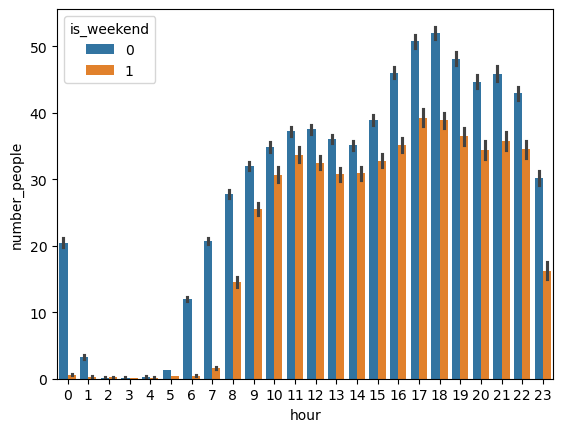

In [25]:
sns.barplot(data =df, x= 'hour', y ='number_people',hue ='is_weekend' )

The average number of people who go to the gym on weekdays is higher than on weekends.

The average number of people who attend the gym on weekdays shows an increase between the hours of 3 PM to 6 PM.

<Axes: xlabel='month', ylabel='number_people'>

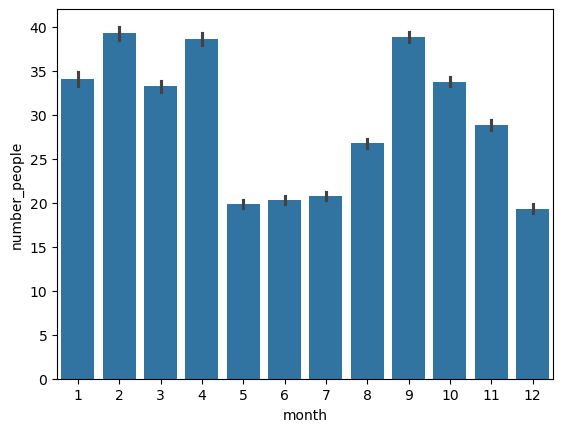

In [26]:
sns.barplot(data=df, x='month', y ='number_people')

In [27]:
df['temperature'].describe()

count    62111.000000
mean        58.571510
std          6.305849
min         38.140000
25%         55.030000
50%         58.370000
75%         62.280000
max         87.170000
Name: temperature, dtype: float64

<Axes: xlabel='month', ylabel='temperature'>

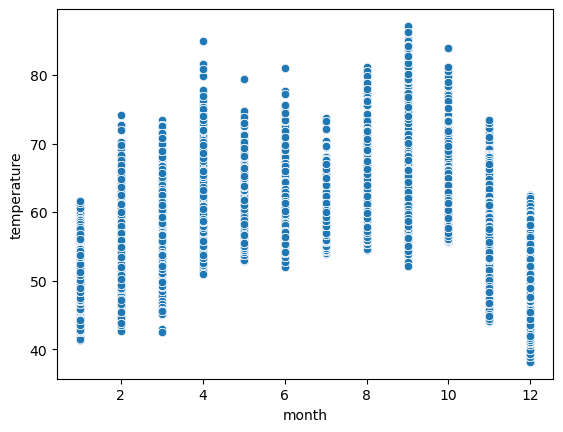

In [28]:
sns.scatterplot(data=df, x= 'month', y = 'temperature')

<Axes: xlabel='temperature', ylabel='Count'>

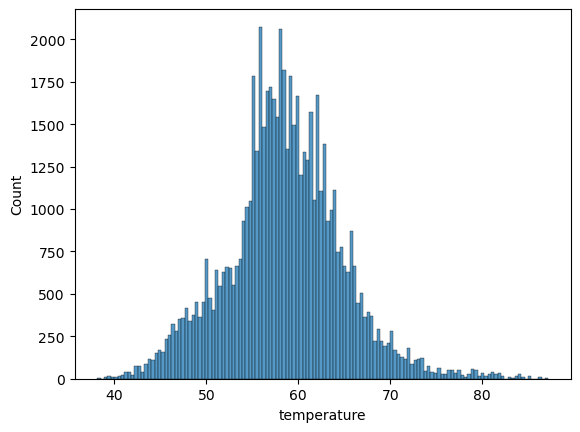

In [29]:
sns.histplot(data=df,x='temperature')

<Axes: >

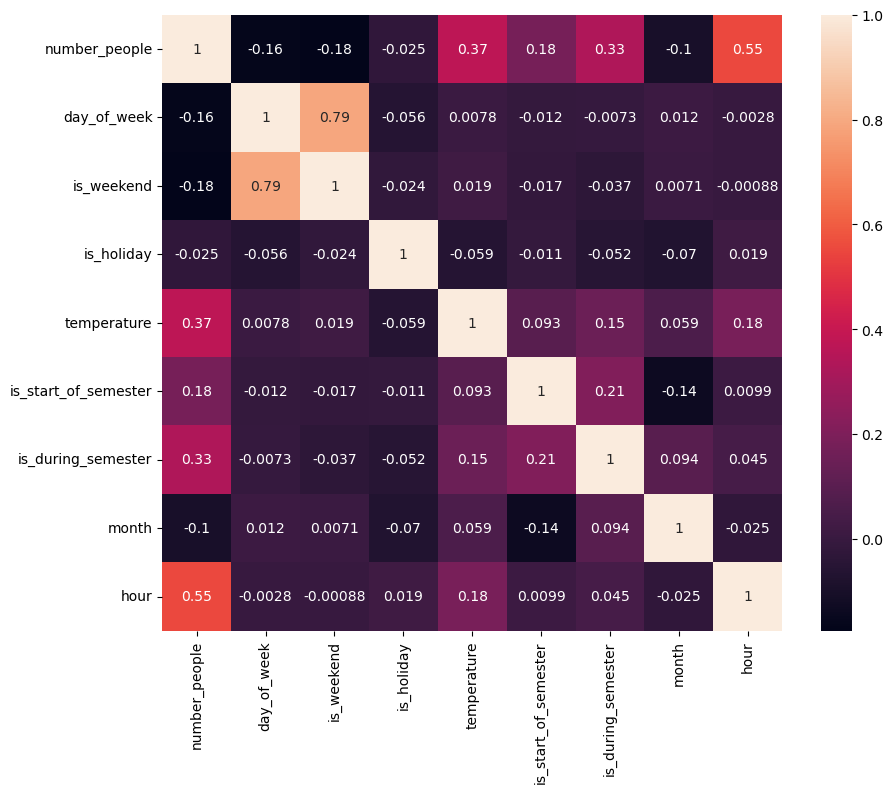

In [30]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(), annot = True)

In [31]:
df.corr()['number_people'].sort_values()

is_weekend             -0.175113
day_of_week            -0.164686
month                  -0.100974
is_holiday             -0.025231
is_start_of_semester    0.182428
is_during_semester      0.333955
temperature             0.371602
hour                    0.552388
number_people           1.000000
Name: number_people, dtype: float64

# Apply the ML Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [33]:
X = df.drop('number_people', axis = 1)
y = df['number_people']

In [34]:
X.head()

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,4,0,0,71.76,0,0,8,17
1,4,0,0,71.76,0,0,8,17
2,4,0,0,71.76,0,0,8,17
3,4,0,0,71.76,0,0,8,17
4,4,0,0,71.76,0,0,8,17


In [35]:
y.head()

0    37
1    45
2    40
3    44
4    45
Name: number_people, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', penalty='elasticnet', random_state = 101)

In [39]:
model.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=101)

In [40]:
y_pred = model.predict(X_test_scaled)

In [41]:
mean_squared_error(y_test,y_pred)

254.8784490850138

In [42]:
r2_score(y_test,y_pred)

0.505250671425667

An r2 of 0.505 indicates that approximately 50.5% of the variance in the target variable is explained by the model. 

This is a moderate value, suggesting that the model has some predictive power but is not capturing all the variability in the data.

In [43]:
mean_absolute_error(y_test,y_pred)

12.069109936562322

In [44]:
residuals = y_pred - y_test
residuals

11779    -1.255790
33386   -21.285617
22047    -6.113165
4569    -49.153897
15020    14.203774
           ...    
46689     6.449524
35830    -2.282879
14750    16.615615
21894    14.676022
31998    -2.787471
Name: number_people, Length: 18634, dtype: float64

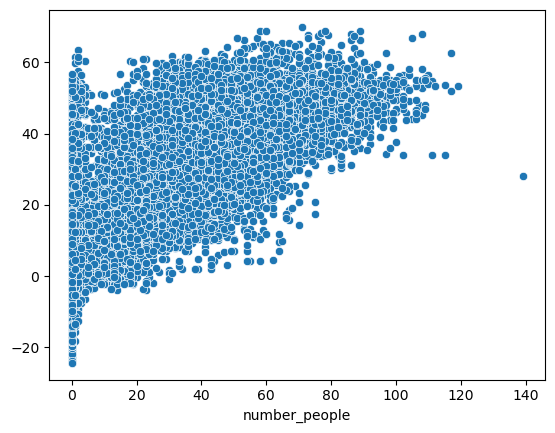

In [49]:
sns.scatterplot(x=y_test,y =y_pred);

Model's predictions deviate from the actual values, especially for higher numbers of people.

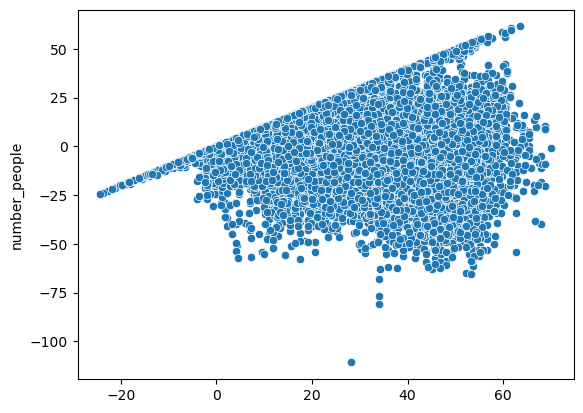

In [48]:
sns.scatterplot(x=y_pred,y =residuals);

Plot suggests that the residuals are not randomly distributed, which indicates that the model's errors are not homoscedastic (having constant variance).